Download cat-dog dataset from https://www.kaggle.com/c/dogs-vs-cats/data

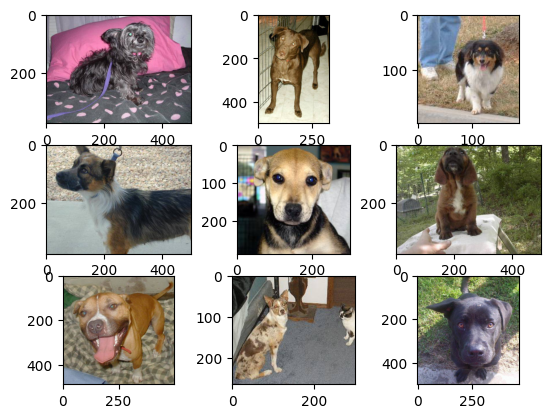

In [1]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread

# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()



Create dataset: two np arrays, first with images (X) second with labels (Y) 0 or 1's 


In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

folder = 'train/'
files = os.listdir(folder)
images = []
labels = []
# LABELS 0 - CAT, 1 - DOG
# print(len(files))

# plot first few images
for f in files:

    if 'cat' in f:
        labels.append(0)
    elif 'dog' in f:
        labels.append(1)
    else:
        continue
    img = cv2.imread(os.path.join(folder, f))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (200, 200))
    images.append(np.array(img))

images = np.array(images)
labels = np.array(labels)
print(images.shape, labels.shape)



(25000, 200, 200) (25000,)


In [5]:
images = images.reshape(25000, 200, 200, 1)

In [6]:
print(images.shape)

(25000, 200, 200, 1)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=42)


Create CNN architecture and train it


In [8]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPooling2D, Flatten

activation = 'relu'
inlayer = Input(shape=(200, 200, 1))
x = Conv2D(64, (3, 3), strides=(1, 1), activation=activation, padding='same')(inlayer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), strides=(1, 1), activation=activation, padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(32, (3, 3), strides=(1, 1), activation=activation, padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(32, activation=activation)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inlayer, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam')

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 1)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 200, 200, 64)      640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 32)      18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 32)        0   

In [10]:
model.fit(X_test, y_test, epochs=5, batch_size=32)






Train on 6250 samples
Epoch 1/5
1760/6250 [=======>......................] - ETA: 2:03 - loss: 7.0827  

KeyboardInterrupt: 